In [2]:
import MEbatch_hs
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [3]:
def show_plots(profiles):
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot(profiles[:, :, i].T)
        
l_v = [6302.5, 2.5, 1]

argument = 1000*(np.linspace(6302.0692255, 6303.2544205, 56) - 6302.5)
argument = np.broadcast_to(argument, (5, 56))

base_parameters = np.broadcast_to(np.array([1000, 15, 20, 30, 1, 50, 0.5, 0.5, 0, 1, 0]), (5, 11))

params_space = fits.open('C:\\data\\parameters_base.fits')[0].data

# Про варьируемые параметры

## 0. B (модуль магнитного поля)

В профиле I расщепляет основной профиль на части и пропорционален расстоянию между расщепленными компонентами. В профилях Q, U, V влияет на величину профиля относительно I и также на расстояние между компонентами.

Естественный диапазон (0, +inf).

Диапазон в Hinode (0, 5000)

В reference файлах параметр под номером 1


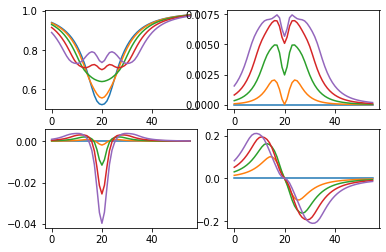

In [4]:
parameters = base_parameters.copy()
parameters.T[0] = np.linspace(0, 5000, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

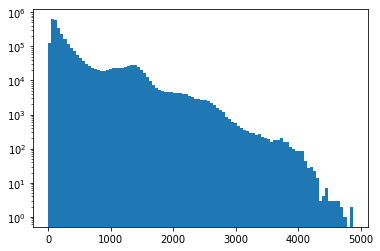

In [14]:
hist = plt.hist(params_space[:, 0], log = 1, bins = 100)
plt.show()

## 1. theta (наклон вектора магнитного поля к лучу зрения)

Влияет на соотношение между профилями V и Q, U.

Естественный диапазон (0, 180)

Диапазон в Hinode (0, 180)

В reference номер 2

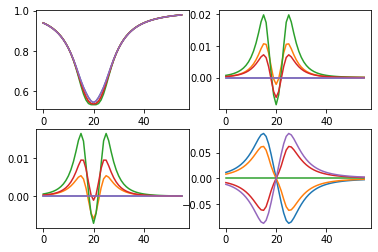

In [69]:
parameters = base_parameters.copy()
parameters.T[1] = np.linspace(0, 180, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

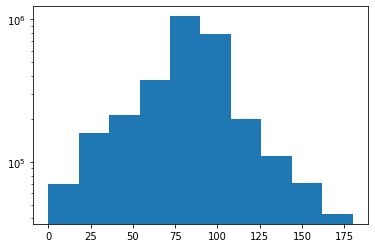

In [15]:
hist = plt.hist(params_space[:, 1], log = 1)
plt.show()

## 2. theta (направление магнитного поля в плоскости, перпендикулярной лучу зрения)

Влияет на соотношение между профилями Q и U.

Естественный диапазон (0, 180) (Из-за неоднозначности не может быть определен полностью, в диапазоне (0, 360))

Диапазон в Hinode (0, 180)

В reference номер 3

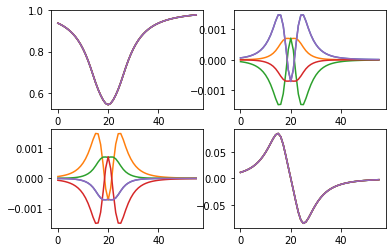

In [70]:
parameters = base_parameters.copy()
parameters.T[2] = np.linspace(0, 180, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

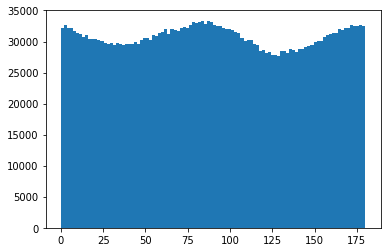

In [19]:
hist = plt.hist(params_space[:, 2], log = 0, bins = 100)
plt.show()

## 3. Doppler broadening (доплеровское уширение)

Влияет на ширину компонент профилей
Естественный диапазон (+0, +inf)

Диапазон в Hinode (20, 90)

В reference номер 6

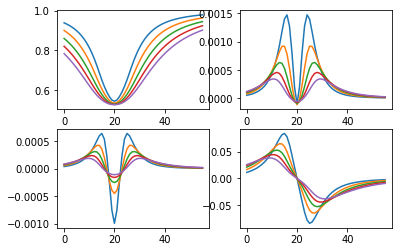

In [73]:
parameters = base_parameters.copy()
parameters.T[3] = np.linspace(30, 70, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

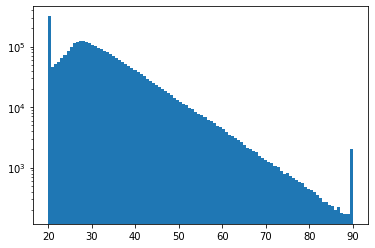

In [21]:
hist = plt.hist(params_space[:, 3], log = 1, bins = 100)
plt.show()

## 4. Damping (лоренцовское уширение)

Также влияет на ширину компонент профилей, но с другой зависимостью

Естественный диапазон (+0, +inf)

Диапазон в Hinode (0, 1.5) (измеряется в единицах доплеровского уширения)

В reference номер 8

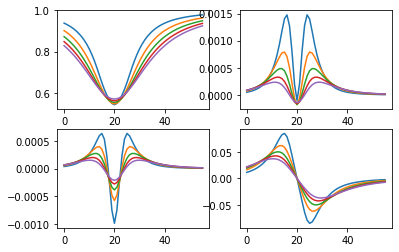

In [77]:
parameters = base_parameters.copy()
parameters.T[4] = np.linspace(1, 4, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

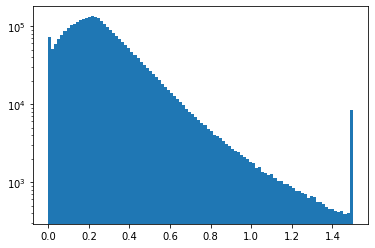

In [23]:
hist = plt.hist(params_space[:, 4], log = 1, bins = 100)
plt.show()

## 5. Line strength (сила линии)

Влияет на глубину компонент профилей

Естественный диапазон (+0, +inf)

Диапазон в Hinode (0.01, 100)

В reference номер 7

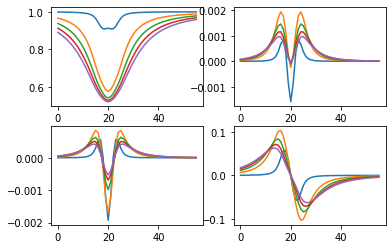

In [80]:
parameters = base_parameters.copy()
parameters.T[5] = np.linspace(1, 100, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

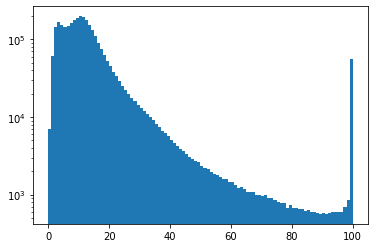

In [24]:
hist = plt.hist(params_space[:, 5], log = 1, bins = 100)
plt.show()

## 6. Source function (функция источников S_0) и 7. Source function gradient (градиент функции источников S_1)

Изменение соотношения между этими параметрами влияет на форму профиля


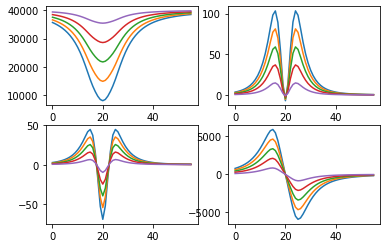

In [84]:
parameters = base_parameters.copy()
parameters.T[6] = np.linspace(5000, 35000, 5)
parameters.T[7] = np.linspace(35000, 5000, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Пропорциональное изменение обоих параметров изменяет только величину профилей, без изменения форм и соотношений между профилями

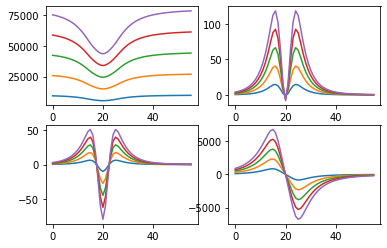

In [83]:
parameters = base_parameters.copy()
parameters.T[6] = np.linspace(5000, 40000, 5)
parameters.T[7] = np.linspace(5000, 40000, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Можно увидеть, что сумма между параметрами примерно соответствует значению в крайней точке профиля I. Это значение называется интенсивностью континуума. О том, для чего мы нормируем на нее профили, см. intensity.ipynb

Точнее говорить, что интенсивности соответствует величина S_0 + mu * S_1. О величине mu см. mu.ipynb. На данный момент мы принимаем mu константно равной 1.


В reference номера 9 и 10 соответственно

Распределение:

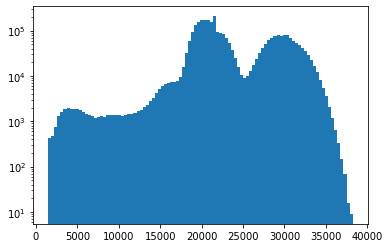

In [25]:
hist = plt.hist(params_space[:, 6], log = 1, bins = 100)
plt.show()

Распределение:

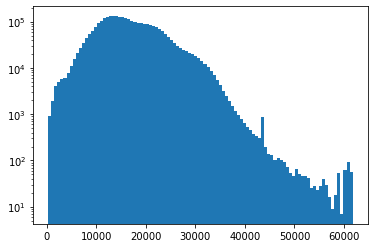

In [26]:
hist = plt.hist(params_space[:, 7], log = 1, bins = 100)
plt.show()

## 8. Doppler shift (доплеровский сдвиг)

Сдвигает профиль без изменения формы и величиный

Естественный диапазон (-inf, +inf)

Диапазон в Hinode (-10, +10)

В reference номер 5

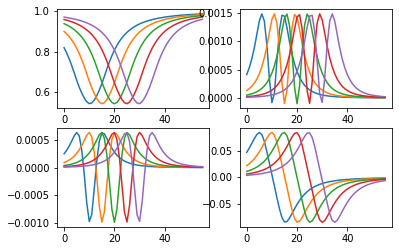

In [85]:
parameters = base_parameters.copy()
parameters.T[8] = np.linspace(-10, 10, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

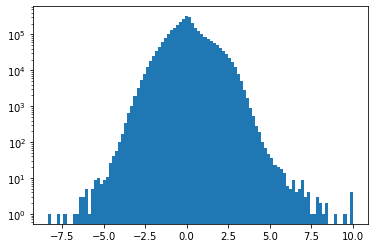

In [27]:
hist = plt.hist(params_space[:, 8], log = 1, bins = 100)
plt.show()

# Фактор заполнения

Перечисленных выше параметров уже достаточно для инверсии в модели атмосферы Милна-Эддингтона. 
Полученные значения параметров будут говорить о значениях интересующей величины, усредненных по поверхности, соответствующей пикселю на изображении. 

Однако, отдельный интерес представляет магнитное поле в элементах, имеющих размеры меньше, чем пиксель. Для его оценки был применен метод частичного заполнения магнитным полем. В данном случае предполагается, что каждый пиксель как будто состоит из двух подпикселей, в одном из которых магнитное поле отсутствует (т.н. невозмущенная компонента). 

Таким образом, результирующий спектр состоит из взвешенной суммы двух спектров со следующими параметрами:
1. B = B, Doppler shift = Doppler shift
2. B = 0, Doppler shift = Stray light Doppler shift

Остальные параметры у этих двух спектров остаются одинаковыми.

Суммирование производится с весами f и (1 - f) соответственно. Таким образом, параметр f (Filling factor) - это доля пикселя, заполненная магнитным полем.

## 9. Filling factor (фактор заполнения)

Влияет на форму профилей

Естественный диапазон (0, 1)

Диапазон в Hinode (0, 1)

В reference номер 12

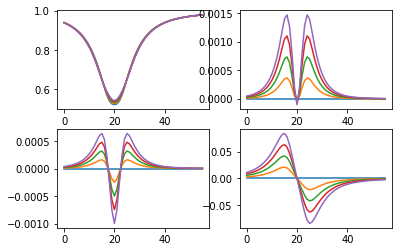

In [86]:
parameters = base_parameters.copy()
parameters.T[9] = np.linspace(0, 1, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Эффект лучше заметен при большой величине магнитного поля (ср. с профилями в пункте 0):

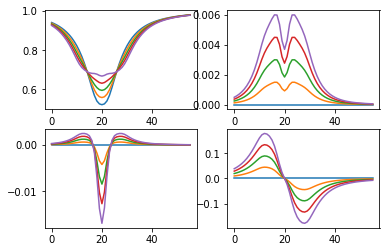

In [88]:
parameters = base_parameters.copy()
parameters.T[0] = 3000*np.ones(5)
parameters.T[9] = np.linspace(0, 1, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

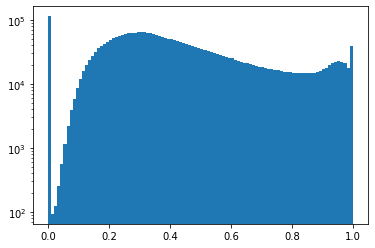

In [28]:
hist = plt.hist(params_space[:, 9], log = 1, bins = 100)
plt.show()

## 10. Stray light Doppler shift (доплеровский сдвиг невозмущенной компоненты)

Влияет на форму профиля I (профили Q, U, V появляются только в магнитном поле)

Естественный диапазон (-inf, +inf)

Диапазон в Hinode (-10, 10)

В reference номер 13

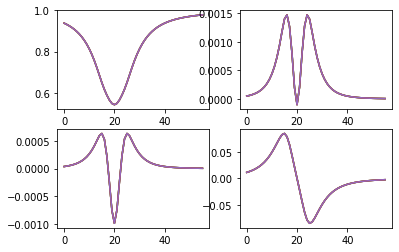

In [89]:
parameters = base_parameters.copy()
parameters.T[10] = np.linspace(-10, 10, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Видим, что профиль не меняется, т.к. filling factor = 1, т.е. весь пиксель заполнен магнитным полем

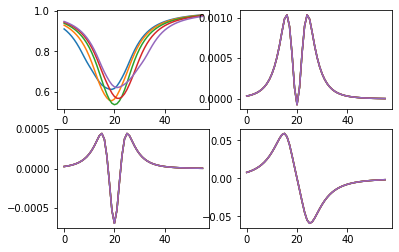

In [92]:
parameters = base_parameters.copy()
parameters.T[9] = 0.7*np.ones(1)
parameters.T[10] = np.linspace(-9, 10, 5)

profile = MEbatch_hs.ME_ff(l_v, parameters, argument)

show_plots(profile)

Распределение:

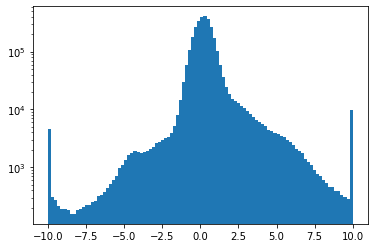

In [29]:
hist = plt.hist(params_space[:, 10], log = 1, bins = 100)
plt.show()